# Supermarket Customer - Data Cleaning

### Benazheer Salsabila

# Data
Sebelum dilakukan analisis, kita akan melakukan data cleaning dan data preparation dulu untuk memudahkan ke tahap selanjutnya. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, lognorm, kstest


import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait data diri customer, produk yang dibeli selama 2 tahun terakhir, penggunaan kupon diskon, dan tempat pembelian. Ada 4 tabel dan 27 kolom di dalam dataset supermarket customer ini, yaitu:  

### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years


### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut 5 baris teratas dan terbawah dari dataset supermarket

In [2]:
df=pd.read_csv('Supermarket Customers.csv')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi data dari dataset supermarket customer.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3


Secara umum, kita bisa melihat bahwa:

* Dataset ini memiliki 29 kolom dan 2240 baris.
* Terdapat 24 ***missing values*** pada kolom Income
* Beberapa kolom pada dataset memiliki **outlier**
* Beberapa kolom memiliki rentang nilai yang cukup bervariasi, seperti MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, dan MntGoldProds, yang menunjukkan variasi dalam preferensi pembelian pelanggan.
* Beberapa kolom memiliki ***wrong data type*** seperti Year_Birth dan Dt_Customer


### Missing Value

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

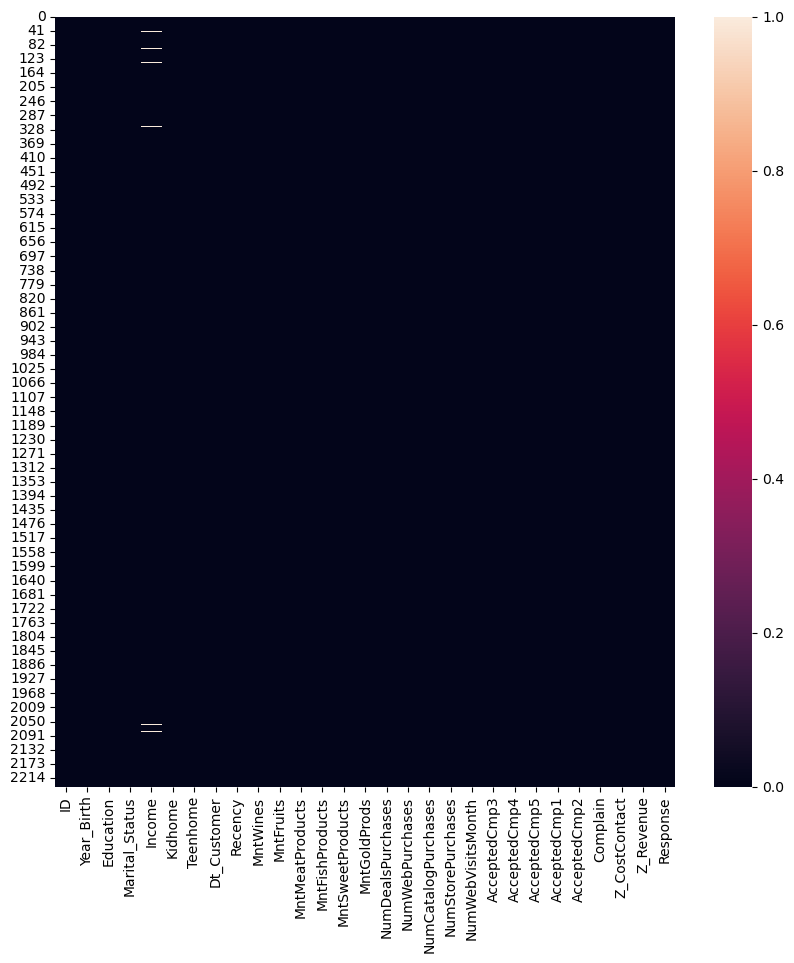

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Secara garis besar:
* *missing value* hanya terdapat pada kolom income dengan proporsi rendah (<10%) dengan nilai 1.07%

Ada 2 cara untuk menangani *missing value* yaitu:
* Pertama, menghapus baris yang berisi missing value. 
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

#### Kolom Income

interval columns not set, guessing: ['Year_Birth', 'Income']
interval columns not set, guessing: ['Year_Birth', 'Income']


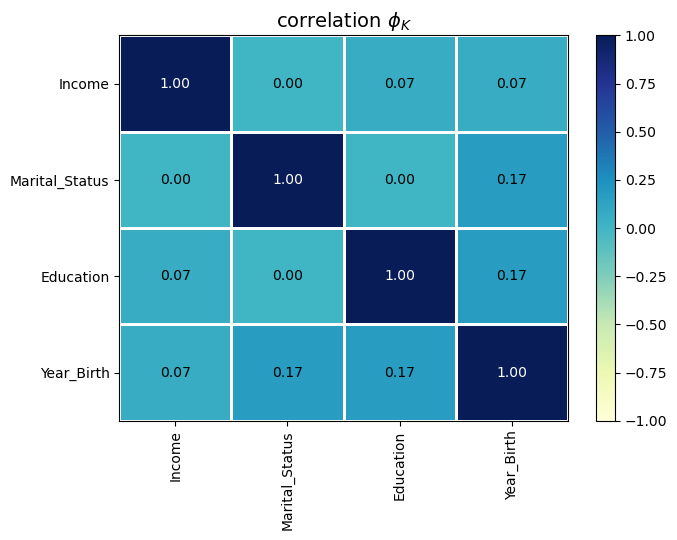

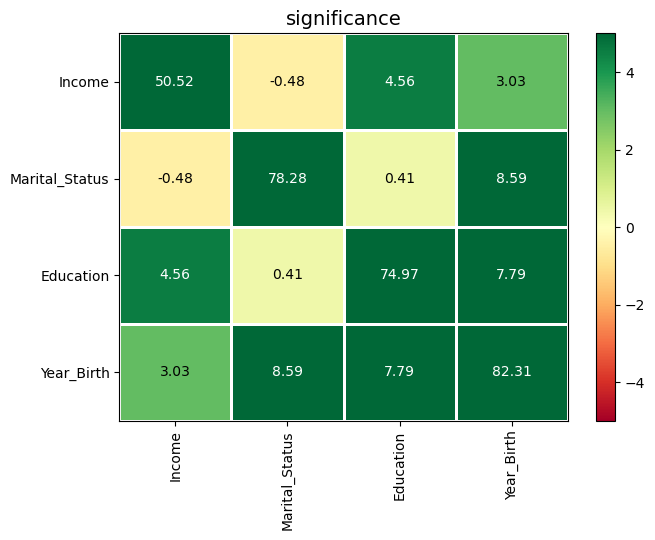

In [8]:
#Mencari Korelasi kolom Income terhadap kolom lainnya
df2 = df[['Year_Birth','Education', 'Marital_Status', 'Income']]

phik_overview = df2.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=-1, vmax=1, color_map="YlGnBu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(7, 5.5))
plt.tight_layout()

significance_overview = df2.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1, figsize=(7,5.5))
plt.tight_layout()

Dari pengecekan diatas dapat disimpulkan bahwa :

* Terdapat Korelasi antara kolom Income dan Year_Birth dimana besarannya 0.11
* Terdapat Korelasi antara kolom Income dan Education dimana besarannya 0.07
* Terdapat Korelasi antara kolom Year_Birth dan Marital_Status dimana besarannya 0.23
* Terdapat Korelasi antara kolom Year_Birth dan Education dimana besarannya 0.26

* Significance values antara kolom Income dan Year_Birth sebesar 3.63
* Significance values antara kolom Income dan Education sebesar 4.50
* Significance values antara kolom Year_Birth dan Marital_Status sebesar 9.3
* Significance values antara kolom Year_Birth dan Education sebesar 7.01

Median: 51381.5


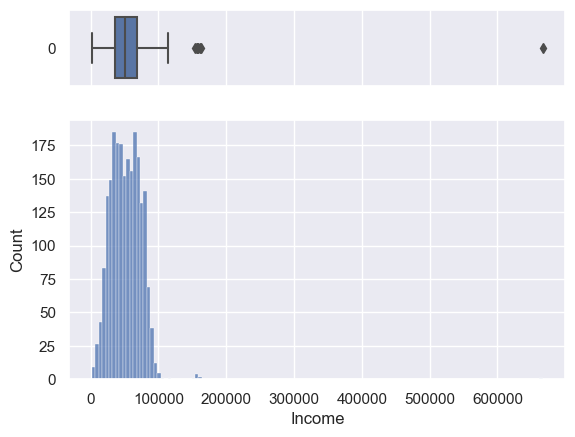

KstestResult(statistic=0.8306304603542572, pvalue=0.0, statistic_location=True, statistic_sign=-1)

In [9]:
# Check Normalitas Income 

# Price variable 
print(f'Median: {df.Income.median()}')
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["Income"], ax=ax_box, orient='h')
sns.histplot(data=df, x="Income", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

kstest(~df['Income'].isna(), 'norm')

Median: 1970.0


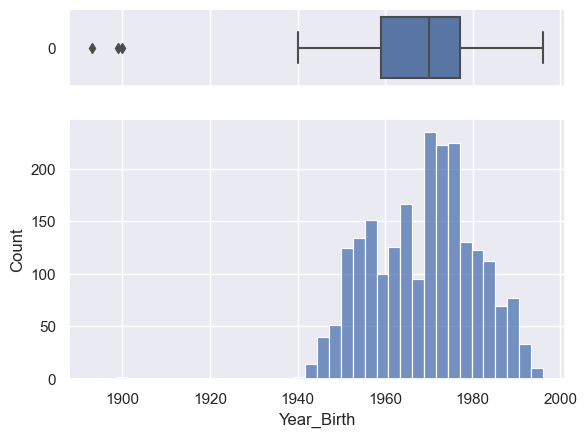

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1893, statistic_sign=-1)

In [10]:
# Check Normalitas Year_Birth

# Price variable 
print(f'Median: {df.Year_Birth.median()}')
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["Year_Birth"], ax=ax_box, orient='h')
sns.histplot(data=df, x="Year_Birth", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

kstest(df['Year_Birth'], 'norm')

Dari pengecekan normalitas diatas dapat disimpulkan bahwa kolom Year_Birth dan Income tidak terdistribusi normal dengan P value sebesar 0 di kedua kolom. Maka pengisian *missing values* akan dilakukan menggunakan median dari dari kolom Income

In [11]:
dfIncomesrc = df.query("~Income.isna()")[['Year_Birth', 'Education', 'Income']].groupby(['Year_Birth','Education']).agg(median_income=('Income', 'median')).reset_index()
dfIncomesrc

,Year_Birth,Education,median_income
0,1893,2n Cycle,60182.0
1,1899,PhD,83532.0
2,1900,2n Cycle,36640.0
3,1940,PhD,51141.0
4,1941,PhD,93027.0
...,...,...,...
227,1994,Graduation,80685.0
228,1995,2n Cycle,81937.0
229,1995,Graduation,34824.0
230,1996,2n Cycle,7500.0


In [12]:
df = pd.merge(df,dfIncomesrc, on = ['Year_Birth','Education'], how = 'left')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,50388.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,60965.5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59594.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,35196.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,50945.0


In [13]:
# mengisi data kosong
for i in range (len(df)):
    if len(str(df.Income[i])) == 3:
        df.Income[i] = df.median_income[i]
    else:
        continue

In [14]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
median_income          0
dtype: int64

### Wrong Data Type

In [15]:
#Year_Birth
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Year_Birth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Year_Birth
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [16]:
#Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


### Duplicate Data

In [17]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income


Pada dataframe tidak ditemukan adanya *duplicate data*

### Outliers

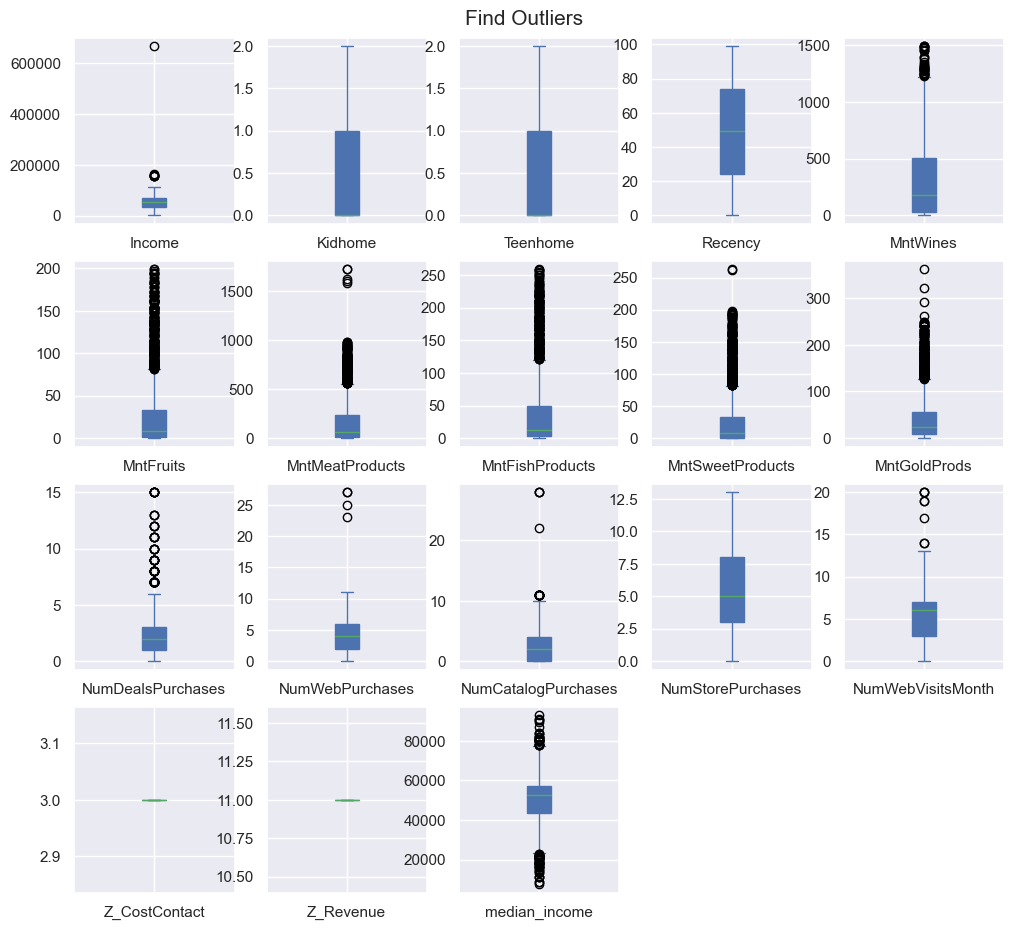

In [18]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

Dari grafik diatas terdapat beberapa kolom yang memiliki outliers. Terutama pada kolom Year_Birth dan Income. Pengisian outliers akan menggunakan korelasi antar kolom yang sudah dilakukan diatas sebelumnya.

#### Year_Birth Outliers

Pada kolom ini dilakukan pengisian outliers menggunakan korelasi antara kolom Year_Birth dan Income

In [19]:
df.Year_Birth.describe()

count    2240                         
mean     1968-10-21 16:33:51.428571432
min      1893-01-01 00:00:00          
25%      1959-01-01 00:00:00          
50%      1970-01-01 00:00:00          
75%      1977-01-01 00:00:00          
max      1996-01-01 00:00:00          
Name: Year_Birth, dtype: object

In [20]:
print('Kuartil pada kolom Income')
q0_inc = np.percentile (df['Income'], 0, interpolation='midpoint')
print(f'Q0 = {q0_inc}')
q1_inc = np.percentile (df['Income'], 25, interpolation='midpoint')
print(f'Q1 = {q1_inc}')
q2_inc = np.percentile (df['Income'], 50, interpolation='midpoint')
print(f'Q2 = {q2_inc}')
q3_inc = np.percentile (df['Income'], 75, interpolation='midpoint')
print(f'Q3 = {q3_inc}')
q4_inc = np.percentile (df['Income'], 100, interpolation='midpoint')
print(f'Q4 = {q4_inc}')

Kuartil pada kolom Income
Q0 = 1730.0
Q1 = 35482.0
Q2 = 51371.0
Q3 = 68334.0
Q4 = 666666.0


In [21]:
print('Kuartil pada kolom Year_Birth')
q0_yb = np.percentile (df['Year_Birth'], 0, interpolation='midpoint')
print(f'Q0 = {q0_yb}')
q1_yb = np.percentile (df['Year_Birth'], 25, interpolation='midpoint')
print(f'Q1 = {q1_yb}')
q2_yb = np.percentile (df['Year_Birth'], 50, interpolation='midpoint')
print(f'Q2 = {q2_yb}')
q3_yb = np.percentile (df['Year_Birth'], 75, interpolation='midpoint')
print (f'Q3 = {q3_yb}')
q4_yb = np.percentile (df['Year_Birth'], 100, interpolation='midpoint')
print(f'Q4 = {q4_yb}')
iqr_yb = (q3_yb - q1_yb)
print(f'IQR = {iqr_yb}')

lowerbound = q1_yb - (1.5 *iqr_yb)
upperbound = q3_yb + (1.5 *iqr_yb)

print (f'Limit tahun lahir terendah {lowerbound}')
print (f'Limit tahun lahir tertinggi {upperbound}')

Kuartil pada kolom Year_Birth
Q0 = 1893-01-01T00:00:00.000000000
Q1 = 1959-01-01T00:00:00.000000000
Q2 = 1970-01-01T00:00:00.000000000
Q3 = 1977-01-01T00:00:00.000000000
Q4 = 1996-01-01T00:00:00.000000000
IQR = 568080000000000000 nanoseconds
Limit tahun lahir terendah 1931-12-31T12:00:00.000000000
Limit tahun lahir tertinggi 2004-01-02T12:00:00.000000000


In [22]:
df.loc[df['Year_Birth'] >= upperbound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income


In [23]:
df.loc[df['Year_Birth'] <= lowerbound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
192,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,36640.0
239,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,60182.0
339,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,83532.0


In [24]:
# Mengubah Outlier Year_Birth berdasarkan kolom Income
modus1 = df.loc[(df['Year_Birth'] >= q0_yb) & (df['Year_Birth'] <= q1_yb)]['Year_Birth'].mode()[0] 
modus2 = df.loc[(df['Year_Birth'] >= q1_yb) & (df['Year_Birth'] <= q2_yb)]['Year_Birth'].mode()[0] 
modus3 = df.loc[(df['Year_Birth'] >= q2_yb) & (df['Year_Birth'] <= q3_yb)]['Year_Birth'].mode()[0] 
modus4 = df.loc[(df['Year_Birth'] >= q3_yb) & (df['Year_Birth'] <= q4_yb)]['Year_Birth'].mode()[0]


def new_yb(df):
    if df['Year_Birth'] < lowerbound:
        if df['Income'] <= q1_inc and df['Income'] >= q0_inc:
            return modus1
        elif df['Income'] <= q2_inc and df['Income'] >= q1_inc:
            return modus2
        elif df['Income'] <= q3_inc and df['Income'] >= q2_inc:
            return modus3
        else:
            return modus4
    else:
        return df['Year_Birth']

df['Year_Birth'] = df.apply(new_yb, axis=1)

In [25]:
df.loc[df['Year_Birth'] <= lowerbound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income


In [26]:
df.Year_Birth
df.Year_Birth.describe()

count    2240                         
mean     1968-11-28 12:26:21.428571428
min      1940-01-01 00:00:00          
25%      1959-01-01 00:00:00          
50%      1970-01-01 00:00:00          
75%      1977-01-01 00:00:00          
max      1996-01-01 00:00:00          
Name: Year_Birth, dtype: object

#### Income Outliers

Pada kolom ini dilakukan pengisian outliers menggunakan korelasi antara kolom Year_Birth dan Income

In [27]:
df['Income'].describe()

count    2240.000000  
mean     52223.116741 
std      25059.825718 
min      1730.000000  
25%      35502.500000 
50%      51371.000000 
75%      68325.000000 
max      666666.000000
Name: Income, dtype: float64

In [28]:
# Mengubah Outlier Income berdasarkan kolom Year_Birth
q0_inc = np.percentile (df['Income'], 0, interpolation='midpoint')
print(f'Q0 = {q0_inc}')
q1_inc = np.percentile (df['Income'], 25, interpolation='midpoint')
print(f'Q1 = {q1_inc}')
q2_inc = np.percentile (df['Income'], 50, interpolation='midpoint')
print(f'Q2 = {q2_inc}')
q3_inc = np.percentile (df['Income'], 75, interpolation='midpoint')
print(f'Q3 = {q3_inc}')
q4_inc = np.percentile (df['Income'], 100, interpolation='midpoint')
print(f'Q4 = {q4_inc}')

iqr_inc = (q3_inc - q1_inc)
print(f'The IQR of the Income column is {iqr_inc}')

lowerbound_inc = q1_inc - (1.5 *iqr_inc)
upperbound_inc = q3_inc + (1.5 *iqr_inc)

print (f'Limit Income terendah adalah {lowerbound_inc}, namun karna penghasilan tidak bisa minus maka limit terendah 0')
lowerbound_inc = 0
print (f'Limit Income tertinggi adalah {upperbound_inc}')

Q0 = 1730.0
Q1 = 35482.0
Q2 = 51371.0
Q3 = 68334.0
Q4 = 666666.0
The IQR of the Income column is 32852.0
Limit Income terendah adalah -13796.0, namun karna penghasilan tidak bisa minus maka limit terendah 0
Limit Income tertinggi adalah 117612.0


In [29]:
df.loc[df['Income'] >= upperbound_inc]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
164,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,3,11,0,47643.0
617,1503,1976-01-01,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,3,11,0,55412.0
655,5555,1975-01-01,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,3,11,0,56243.0
687,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,3,11,0,70038.0
1300,5336,1971-01-01,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,3,11,0,41313.0
1653,4931,1977-01-01,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,3,11,0,42014.0
2132,11181,1949-01-01,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,3,11,0,63259.0
2233,9432,1977-01-01,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,42014.0


In [30]:
def new_inc(df):
    if df['Income'] > upperbound_inc:
        return q2_inc
    else:
        return df['Income']

df['Income'] = df.apply(new_inc, axis=1)

In [31]:
df.loc[df['Income'] >= upperbound_inc]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income


# Data Preparation

untuk mempermudah analisis, pengecekan value yang tidak sesuai dapat dilakukan

#### Kolom Marital Status

Pada kolom ini terdapat beberapa value yang kurang sesuai seperti Together, Alone, Absurd, YOLO]
Untuk memudahkan dapat dilakukan perubahan value pada data menjadi :

* Together => Married
* Alone, Absurd, YOLO, Divorced, Widow => Single

In [32]:
#Merubah Value Alone Absurd dan YOLO menjadi kategori Single
df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Divorced', 'Widow'], 'Single', inplace=True)

In [33]:
#Merubah Value Together menjadi kategori Married
df['Marital_Status'].replace(['Together'], 'Married', inplace=True)

In [34]:
df.Marital_Status.value_counts()

Marital_Status
Married    1444
Single     796 
Name: count, dtype: int64

#### Kolom Education

Pada kolom ini terdapat beberapa value yang kurang sesuai seperti 2n Cycle
Untuk memudahkan dapat dilakukan perubahan value pada data

In [35]:
#Merubah Value 2n Cycle menjadi kategori Master
df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)

In [36]:
df.Education.value_counts()

Education
Graduate         1127
Postgraduate     856 
Undergraduate    257 
Name: count, dtype: int64

## Add and Grouping Column

Untuk memudahkan analisis data dapat ditambahkan kolom baru seperti :

* Age : Umur customer, dapat diambil dari Year_Birth
* Join_year: Tahun join sebagai customer, dapat diambil dari Dt_Customer
* Childhome: Jumlah anak di dalam keluarga, dapat diambil dari kolom Kidhome dan Teenhome.
* Total_Mnt: Total pembelian barang 2 tahun terakhir, dapat diambil dari menjumlahkan semua kolom "Mnt"-
* Total_num_purchase: Total pembelanjaan 2 tahun terakhir, dapat diambil dari menjumlahkan semua kolom "Num"- columns
* Total_accept: Total penggunaan discount, dapat diambil dari kolom "Accepted"- dan "Response"
* Order_value: Average order value, dapat diambil dari pembagian Total_Mnt dan Total_num_purchase

Dari tabel 'Year_Birth' kita dapat menentukan data umur customer, namun sebelumnya kita harus menentukan tahun dataset ini diambil. Pada dataset ini hanya terdapat 2 kolom yang menggunakan tipe data date yaitu 'Year_Birth' yang berisikan tahun kelahiran customer dan 'Dt_Customer' yang berisikan tanggal *enroll customer* sebagai member. Oleh karena itu, kita dapat menggunakan kolom 'Dt_Customer' sebagai acuan perkiraan tanggal dataset ini diambil.

In [37]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df_sorted = df.sort_values(by='Dt_Customer', ascending=False)
pd.set_option('display.max_columns', None)
top_5_recent = df_sorted.head(5)

print(top_5_recent)

        ID Year_Birth     Education Marital_Status   Income  Kidhome  \
200   7300 1952-01-01  Graduate      Single         69142.0  0         
989   453  1956-01-01  Postgraduate  Single         35340.0  1         
1812  8093 1969-01-01  Postgraduate  Married        79734.0  0         
796   6722 1954-01-01  Postgraduate  Married        70421.0  0         
45    1371 1976-01-01  Graduate      Single         79941.0  0         

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
200   1        2014-06-29   50       448       4          34                
989   1        2014-06-29   1        27        0          12                
1812  0        2014-06-28   72       572       8          232               
796   1        2014-06-28   98       479       28         136               
45    0        2014-06-28   72       123       164        266               

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
200   6                4    

Setelah dilakukan pengurutan berdasarkan kolom Dt_Customer tahun *enroll member* terbaru pada bulan desember tahun 2014, dari tabel diatas juga dapat dilihat bahwa MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProdcts dan MntGoldProds dari 2 tahun terakhir tergolong sedikit. Maka dapat disimpulkan bahwa tahun pengambilan data berada dikisaran 2015

In [38]:
current_year = 2015

df['Age'] = current_year - df['Year_Birth'].dt.year

In [39]:
df["Join_year"] = df.Dt_Customer.dt.year
df["Childhome"] = df.Kidhome + df.Teenhome
df['Total_Mnt'] = df.MntWines+ df.MntFruits+ df.MntMeatProducts+ df.MntFishProducts+ df.MntSweetProducts+ df.MntGoldProds 
df['Total_num_purchase'] = df.NumDealsPurchases+ df.NumWebPurchases+ df.NumCatalogPurchases+ df.NumStorePurchases+ df.NumWebVisitsMonth 
df['Total_accept'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp2 + df.AcceptedCmp2  + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
df['Order_value'] = df.Total_Mnt/df.Total_num_purchase

In [40]:
df.sample(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income,Age,Join_year,Childhome,Total_Mnt,Total_num_purchase,Total_accept,Order_value
1122,675,1973-01-01,Postgraduate,Single,52034.0,1,1,2013-05-17,67,146,0,93,7,13,73,5,4,2,5,7,0,0,0,0,0,0,3,11,0,44051.0,42,2013,2,332,23,0,14.434783
1030,5204,1971-01-01,Graduate,Married,74538.0,0,0,2013-06-29,21,380,98,733,110,112,28,1,8,8,5,3,0,0,1,0,0,0,3,11,1,42075.5,44,2013,0,1461,25,2,58.440000
927,3139,1982-01-01,Undergraduate,Single,74116.0,0,0,2013-12-30,53,871,111,704,145,55,166,1,4,4,10,2,0,1,0,0,0,0,3,11,0,58582.0,33,2013,0,2052,21,1,97.714286
1463,10403,1978-01-01,Graduate,Married,16531.0,1,0,2014-06-18,43,2,13,6,7,5,11,3,3,0,3,7,0,0,0,0,0,0,3,11,0,43526.0,37,2014,1,44,16,0,2.750000
967,7011,1973-01-01,Graduate,Married,33471.0,1,0,2012-10-12,47,43,2,27,0,9,12,3,3,0,4,7,0,0,0,0,0,0,3,11,0,50121.0,42,2012,1,93,17,0,5.470588
982,6634,1979-01-01,Postgraduate,Single,33462.0,1,0,2013-08-07,78,22,3,18,0,0,11,1,2,0,3,7,0,0,0,0,0,0,3,11,0,33462.0,36,2013,1,54,13,0,4.153846


## Categorize Column

In [41]:
# Categorize Income

def groupincome(x):
    if x <= 35303:
        return '1. Lower'
    elif x <= 51377.25:
        return '2. Lower-Middle'
    elif x <= 68179.5:
        return '3. Upper-Middle'
    else:
        return '4. Upper'
    
df.insert(5, column='Income_category', value=df['Income'].apply(groupincome))

df.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income,Age,Join_year,Childhome,Total_Mnt,Total_num_purchase,Total_accept,Order_value
0,5524,1957-01-01,Graduate,Single,58138.0,3. Upper-Middle,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,50388.0,58,2012,0,1617,32,1,50.531250
1,2174,1954-01-01,Graduate,Single,46344.0,2. Lower-Middle,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60965.5,61,2014,2,27,11,0,2.454545
2,4141,1965-01-01,Graduate,Married,71613.0,4. Upper,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59594.0,50,2013,0,776,25,0,31.040000
3,6182,1984-01-01,Graduate,Married,26646.0,1. Lower,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,35196.0,31,2014,1,53,14,0,3.785714
4,5324,1981-01-01,Postgraduate,Married,58293.0,3. Upper-Middle,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,50945.0,34,2014,1,422,24,0,17.583333


## Dropping Column

Beberapa kolom mungkin tidak digunakan dalam data analisis ini, yaitu:
* Z_Revenue
* Z_CostContact

Kolom tersebut dapat dihapus

In [42]:
df.drop(columns=['Z_CostContact'], axis=1, inplace=True)
df.drop(columns=['Z_Revenue'], axis=1, inplace=True)

In [43]:
df.sample(6)

,ID,Year_Birth,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,median_income,Age,Join_year,Childhome,Total_Mnt,Total_num_purchase,Total_accept,Order_value
2207,4333,1954-01-01,Graduate,Married,32144.0,1. Lower,1,1,2014-03-23,76,41,0,10,0,0,3,4,2,1,3,7,0,1,0,0,0,0,0,60965.5,61,2014,2,54,17,1,3.176471
373,1245,1966-01-01,Graduate,Single,63810.0,3. Upper-Middle,0,1,2012-11-11,45,977,12,253,16,12,101,4,4,3,12,8,0,1,0,0,0,0,0,54942.0,49,2012,1,1371,31,1,44.225806
405,194,1965-01-01,Graduate,Married,48006.0,2. Lower-Middle,1,1,2014-06-09,55,23,0,11,3,2,2,1,1,0,3,6,0,0,0,0,0,0,0,59594.0,50,2014,2,41,11,0,3.727273
2026,4198,1965-01-01,Graduate,Married,29672.0,1. Lower,1,1,2013-03-12,6,9,1,3,0,4,8,1,0,0,3,6,0,0,0,0,0,0,0,59594.0,50,2013,2,25,10,0,2.500000
873,738,1981-01-01,Undergraduate,Single,42395.0,2. Lower-Middle,1,1,2014-04-04,35,48,13,57,24,15,25,4,3,1,4,7,0,0,0,0,0,0,0,42395.0,34,2014,2,182,19,0,9.578947
907,1968,1971-01-01,Graduate,Single,45684.0,2. Lower-Middle,1,0,2013-12-02,37,5,1,5,10,0,7,1,1,0,2,7,0,0,0,0,0,0,0,42075.5,44,2013,1,28,11,0,2.545455


# Data yang Sudah Bersih

Data yang sudah bersih dapat disimpan untuk dilakukan analisis

In [44]:
# saving data to xlsx
df.to_excel(f"capstone2.xlsx")

In [45]:
# saving data to csv
df.to_csv(f"capstone2.csv")